In [17]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [20]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
filepath = Path('Resources/lending_data.csv')
lending_data_df = pd.read_csv(filepath)
# Review the DataFrame
lending_data_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [6]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data_df.loan_status

# Separate the X variable, the features
X = lending_data_df.drop(columns = 'loan_status', axis = 1)

In [7]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [22]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [9]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [10]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [24]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logReg_model = LogisticRegression(random_state = 1)

# Fit the model using training data

logReg_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [28]:
# Make a prediction using the testing data
#_predictions = logistic_classifier.predict(X_test)
#logistic_pred_df = pd.DataFrame({"Prediction": logistic_predictions, "Actual": y_test}).reset_index(drop = True)
#logistic_pred_df.tail(10)
logReg_pred = logReg_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [29]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, logReg_pred)

0.9520479254722232

Confusion Matrix


,Predicted Healthy loan,Predicted High-Risk loan
Actual Healthy loan,18663,102
Actual High-Risk loan,56,563


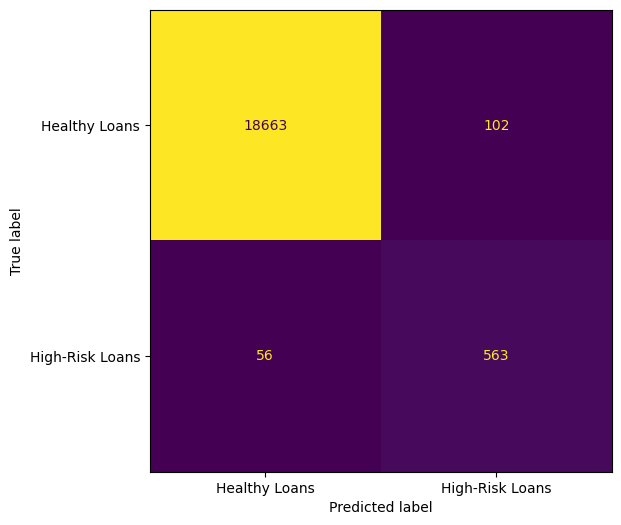

In [48]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, logReg_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Healthy loan", "Actual High-Risk loan"], columns=["Predicted Healthy loan", "Predicted High-Risk loan"]
)

print("Confusion Matrix")
display(cm_df)



from sklearn.metrics import  ConfusionMatrixDisplay
# create confusion matrix from predictions
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    logReg_pred,  
    ax=ax,
    display_labels=["Healthy Loans", "High-Risk Loans"], 
    colorbar=False
)

plt.savefig("model1", dpi=300)  # save the plot
plt.show()

In [31]:
# Print the classification report for the model
print(classification_report(y_test, logReg_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model performs commendably with the imbalanced dataset, achieving an accuracy score of 95%. This score signifies the model's strong predictive power, especially given the disparity between healthy and high-risk loans in the dataset. Delving deeper into the classification report, the model exhibits a 100% precision in predicting healthy loans and 85% precision for high-risk loans.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [37]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros_model = RandomOverSampler(random_state = 1)

# Fit the original training data to the random_oversampler model

x_oversampled, y_oversampled = ros_model.fit_resample(X_train, y_train)

In [38]:
# Count the distinct values of the resampled labels data
y_oversampled.value_counts()

0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [41]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logReg_oversampled_model = LogisticRegression(random_state = 1)

# Fit the model using the resampled training data
logReg_oversampled_model.fit(x_oversampled, y_oversampled)

# Make a prediction using the testing data
logReg_oversampled_pred = logReg_oversampled_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [42]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, logReg_oversampled_pred)

0.9936781215845847

Confusion Matrix


,Predicted Healthy loan,Predicted High-Risk loan
Actual Healthy loan,18649,116
Actual High-Risk loan,4,615


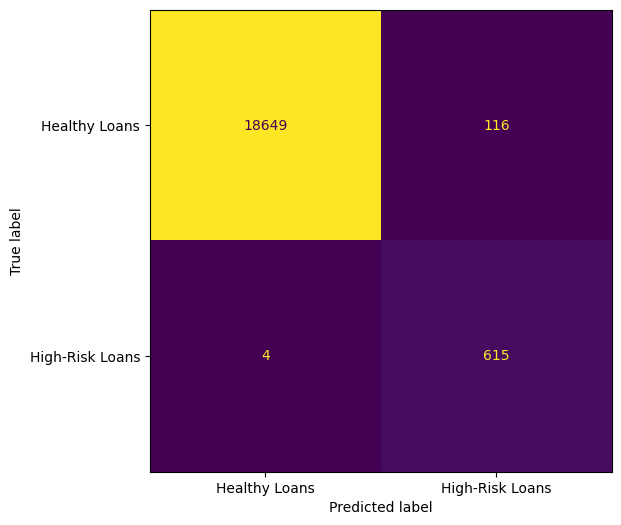

In [49]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, logReg_oversampled_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Healthy loan", "Actual High-Risk loan"], columns=["Predicted Healthy loan", "Predicted High-Risk loan"]
)

print("Confusion Matrix")
display(cm_df)

# create confusion matrix from predictions
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    logReg_oversampled_pred,  
    ax=ax,
    display_labels=["Healthy Loans", "High-Risk Loans"], 
    colorbar=False
)

plt.savefig("Model2", dpi=300)  # save the plot
plt.show()

In [44]:
# Print the classification report for the model
print(classification_report(y_test, logReg_oversampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model trained on oversampled data exhibits a notable improvement, achieving an accuracy score of 99%, compared to the 95% of the original imbalanced model.

This enhancement in the model's performance can be attributed to oversampling, which likely allowed the model to better identify outliers and anomalies, leading to improved accuracy.

In terms of prediction specifics:

Healthy loans (label 0) are predicted with a precision of 100%.
High-risk loans (label 1) are predicted with a precision of 84%.
Furthermore, the disparity between the actual and predicted counts for healthy loans and high-risk loans suggests that the model has a strong inclination towards accurately predicting healthy loans—a desirable trait. The misclassifications are minimal, with the majority of high-risk loans being correctly identified.